## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
# !pip install pandas=="0.24.0" --quiet
# !pip install seaborn=="0.9.0" --quiet
# !pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

sns.set()

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.25.1
Usando seaborn 0.9.0
Usando scipy 1.3.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv')

new_names = {
    'movieId': 'filmeId',
    'title': 'titulo',
    'genres': 'generos'
}

filmes.rename(columns=new_names, inplace=True)
filmes.set_index('filmeId', inplace=True)

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv')

new_names = {
    'userId': 'usuarioId',
    'movieId': 'filmeId',
    'rating': 'nota',
    'timestamp': 'momento'
}

notas.rename(columns=new_names, inplace=True)

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução
filmes['nota_media'] = notas.groupby('filmeId')['nota'].mean()

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme
total_de_votos = notas.groupby('filmeId')['nota'].count()

In [12]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = total_de_votos
filmes = filmes[filmes['total_de_votos'] >= 50]

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0, 0.5, 'Frequência')

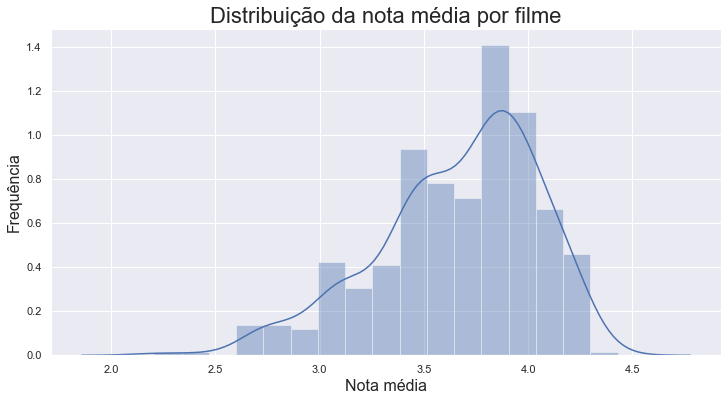

In [14]:
# solução histograma
ax = sns.distplot(filmes['nota_media'])

ax.figure.set_size_inches((12, 6))
ax.set_title('Distribuição da nota média por filme', fontsize=22)
ax.set_xlabel('Nota média', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)

Text(0, 0.5, 'Frequência')

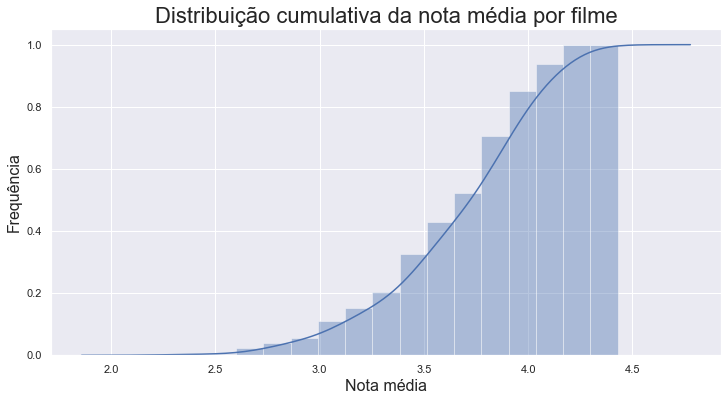

In [15]:
# solução cumulativa
ax = sns.distplot(filmes['nota_media'], hist_kws={'cumulative': True}, kde_kws={'cumulative': True})

ax.figure.set_size_inches((12, 6))
ax.set_title('Distribuição cumulativa da nota média por filme', fontsize=22)
ax.set_xlabel('Nota média', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0, 0.5, 'Frequência')

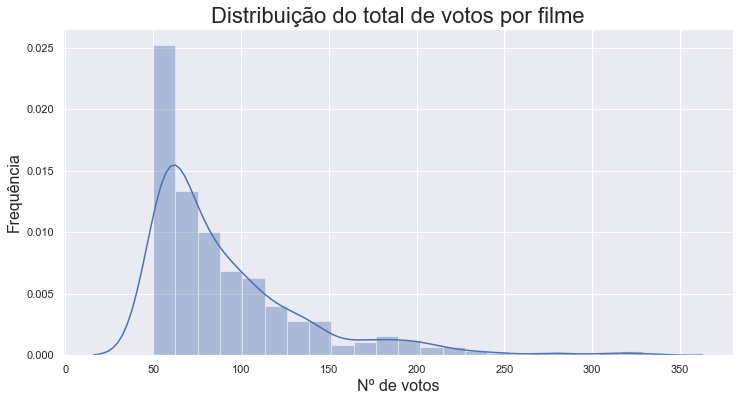

In [16]:
# solução histograma
ax = sns.distplot(filmes['total_de_votos'])

ax.figure.set_size_inches((12, 6))
ax.set_title('Distribuição do total de votos por filme', fontsize=22)
ax.set_xlabel('Nº de votos', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)

Text(0, 0.5, 'Frequência')

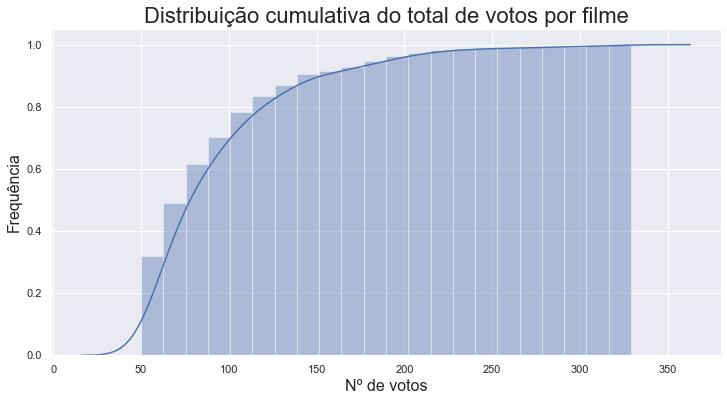

In [17]:
# solução cumulativa
ax = sns.distplot(filmes['total_de_votos'], hist_kws={'cumulative': True}, kde_kws={'cumulative': True})

ax.figure.set_size_inches((12, 6))
ax.set_title('Distribuição cumulativa do total de votos por filme', fontsize=22)
ax.set_xlabel('Nº de votos', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [18]:
# solução
nota_limite_dos_20_porcento = notas['nota'].quantile(0.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 4.50


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

Text(0.5, 1.0, 'Total de filmes por gênero')

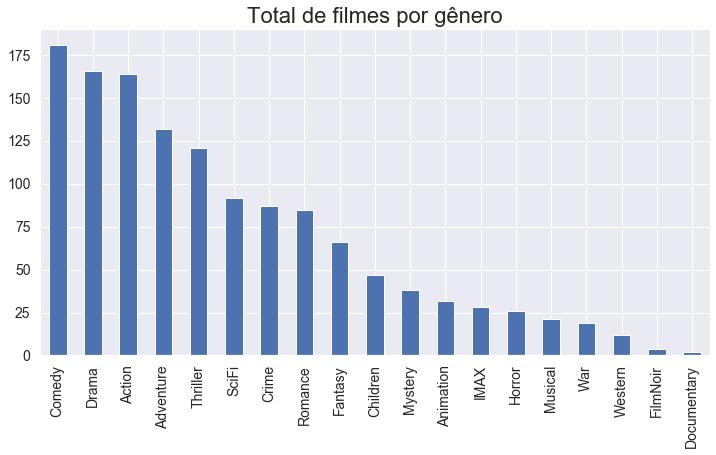

In [22]:
# solução
total_filmes_por_genero = generos.sum().sort_values(ascending=False)

ax = total_filmes_por_genero.plot.bar(figsize=(12, 6), fontsize=14)
ax.set_title('Total de filmes por gênero', fontsize=22)

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [23]:
# solução
top5_generos_em_quantidade_de_filmes = total_filmes_por_genero[:5].index.to_list()

In [24]:
print(top5_generos_em_quantidade_de_filmes)

['Comedy', 'Drama', 'Action', 'Adventure', 'Thriller']


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
# solucão
total_votos_por_genero = votos_por_genero.sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Total de votos por gênero')

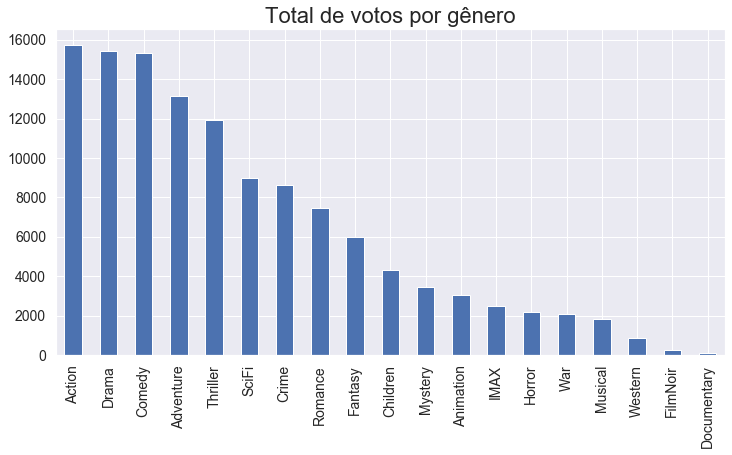

In [27]:
# solução
ax = total_votos_por_genero.plot.bar(figsize=(12, 6), fontsize=14)
ax.set_title('Total de votos por gênero', fontsize=22)

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solucao código
total_votos_por_genero_por_filme = total_votos_por_genero / total_filmes_por_genero
total_votos_por_genero_por_filme.sort_values(ascending=False, inplace=True)
total_votos_por_genero_por_filme

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

Text(0.5, 1.0, 'Total de votos por filme por gênero')

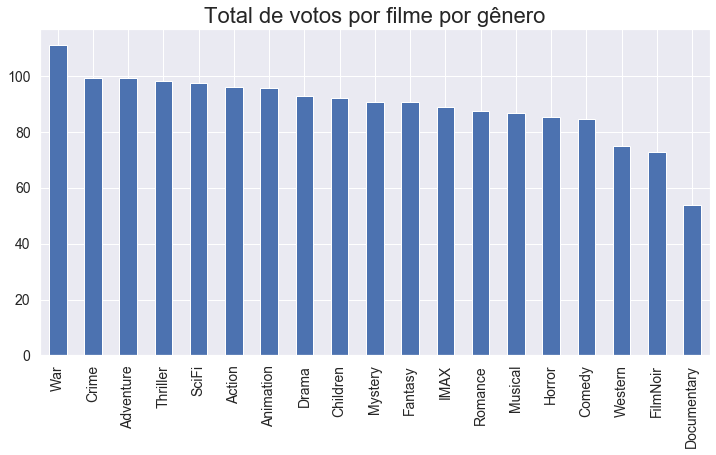

In [29]:
# solução com visualização 
ax = total_votos_por_genero_por_filme.plot.bar(figsize=(12, 6), fontsize=14)
ax.set_title('Total de votos por filme por gênero', fontsize=22)

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):

War apresenta poucos filmes e poucos votos no geral, mas apresenta um grande número de votos por filme, enquanto Action é o inverso, com muitos filmes e muitos votos no geral, mas com um número de votos por filme menor que War.

O motivo dessa diferença é provavelmenta o grande número de filmes do genero Action, 157, assim o grande número de votos está diluído em muitos filmes, em comparação ao genero War com apenas 17 filmes.
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

(array([1, 2]), <a list of 2 Text yticklabel objects>)

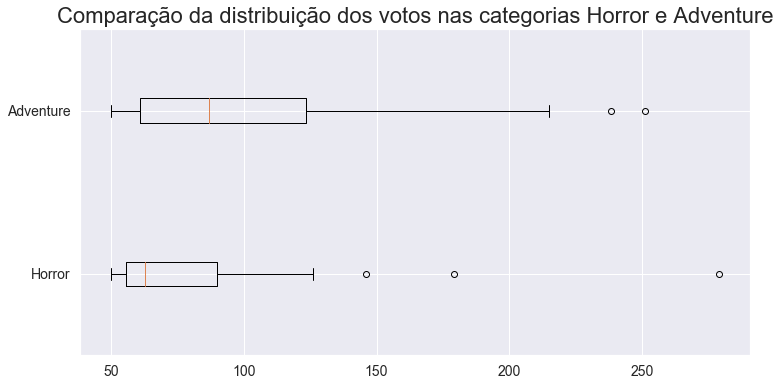

In [30]:
# solução:
plt.figure(figsize=(12, 6))
plt.boxplot(
    [filmes.query('Horror == 1')['total_de_votos'], filmes.query('Adventure == 1')['total_de_votos']],
    labels=['Horror', 'Adventure'],
    vert=False
)

plt.title('Comparação da distribuição dos votos nas categorias Horror e Adventure', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]), <a list of 19 Text yticklabel objects>)

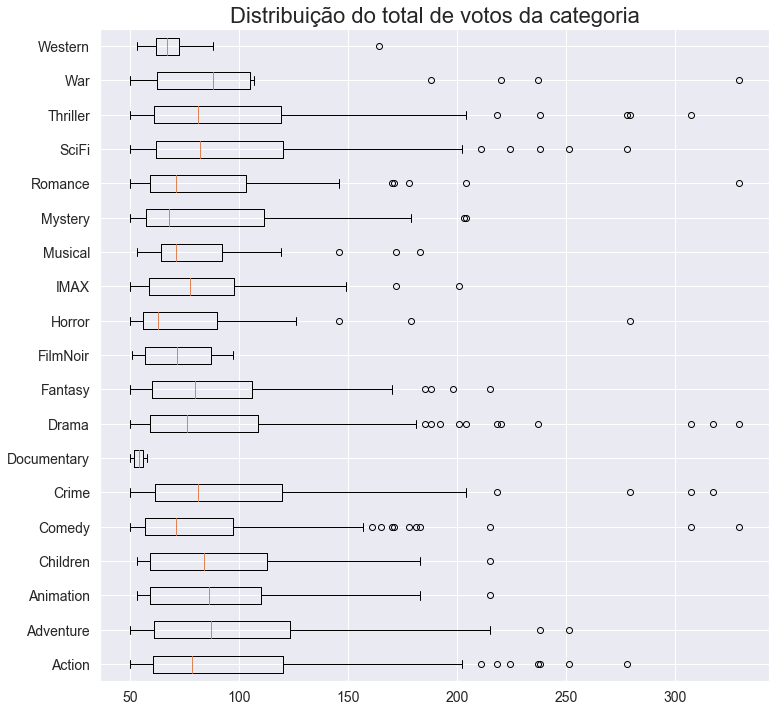

In [31]:
plt.figure(figsize=(12, 12))
plt.boxplot(
    [filmes.query(cat + ' == 1')['total_de_votos'] for cat in generos.columns],
    labels=generos.columns,
    vert=False
)

plt.title('Distribuição do total de votos da categoria', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    
Sugiro o gênero Adventure, o maior número de votos geral e principalmente por filme indica uma maior popularidade.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0, 0.5, 'Frequência')

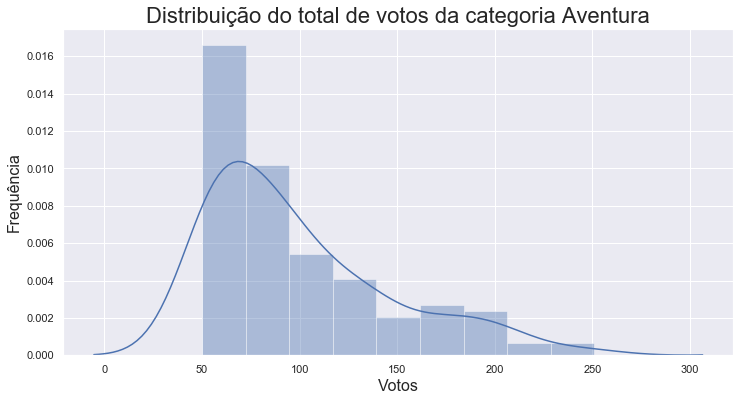

In [32]:
# solucao histograma de aventura
ax = sns.distplot(filmes.query('Adventure == 1')['total_de_votos'])

ax.figure.set_size_inches((12, 6))
ax.set_title('Distribuição do total de votos da categoria Aventura', fontsize=22)
ax.set_xlabel('Votos', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)

Text(0, 0.5, 'Frequência')

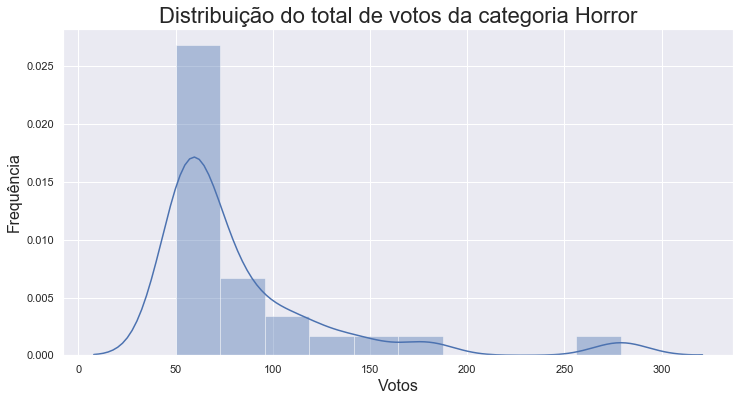

In [33]:
# solucao histograma de horror
ax = sns.distplot(filmes.query('Horror == 1')['total_de_votos'])

ax.figure.set_size_inches((12, 6))
ax.set_title('Distribuição do total de votos da categoria Horror', fontsize=22)
ax.set_xlabel('Votos', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)

In [34]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

stat, pa = normaltest(filmes.query('Adventure == 1')['total_de_votos'])
stat, ph = normaltest(filmes.query('Horror == 1')['total_de_votos'])

print('p-value Adventure: %0.15f' % pa)
print('p-value Horror: %0.15f' % ph)

p-value Adventure: 0.000005987863006
p-value Horror: 0.000000127861489


Como indicado pelo normaltest, nenhuma das duas distribuições apresentam uma distribuição normal.

In [35]:
# solução com o teste desejado
from scipy.stats import ranksums

total_votos_adventure = filmes.query('Adventure == 1')['total_de_votos']
total_votos_horror = filmes.query('Horror == 1')['total_de_votos']

stat, p = ranksums(total_votos_adventure, total_votos_horror)
print('ranksums p-value: %0.5f' % p)

ranksums p-value: 0.04782


### Solução (explique sua conclusão):

Após realizar o teste de normalidade confirmamos que as distribuições não são normais, como já indicado pela análise visual. Ao aplicar o Wilcoxon Ranksums podemos ver que realmente uma distribuição apresenta valores maiores que a outra.

Assim a sugestão do gênero Adventure continua, o teste estatístico apenas confirmou o que foi visto nos testes visuais.

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

(array([1, 2]), <a list of 2 Text yticklabel objects>)

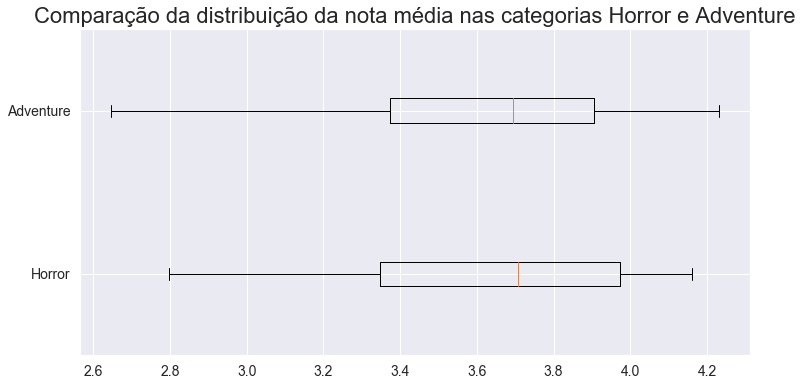

In [36]:
# solução:
plt.figure(figsize=(12, 6))
plt.boxplot(
    [filmes.query('Horror == 1')['nota_media'], filmes.query('Adventure == 1')['nota_media']],
    labels=['Horror', 'Adventure'],
    vert=False
)

plt.title('Comparação da distribuição da nota média nas categorias Horror e Adventure', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

Recomendo o gênero Horror.

Analisando apenas pelo boxplot o gênero Horror apresenta uma maior concentração de filmes com médias altas em comparação a Adventure, mesmo que seja uma pequena margem de diferença.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0, 0.5, 'Frequência')

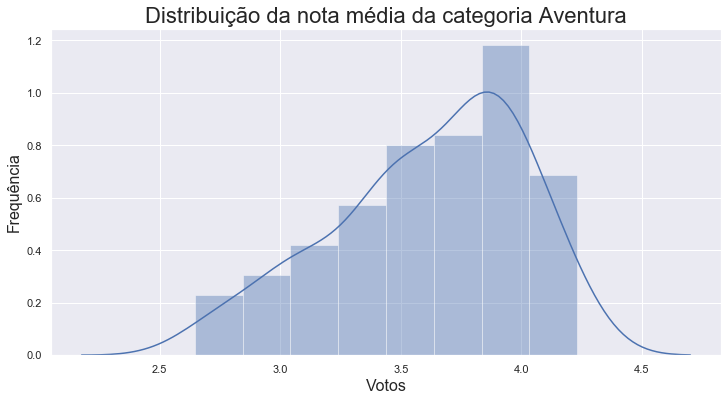

In [37]:
# solucao histograma de aventura
ax = sns.distplot(filmes.query('Adventure == 1')['nota_media'])

ax.figure.set_size_inches((12, 6))
ax.set_title('Distribuição da nota média da categoria Aventura', fontsize=22)
ax.set_xlabel('Votos', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)

Text(0, 0.5, 'Frequência')

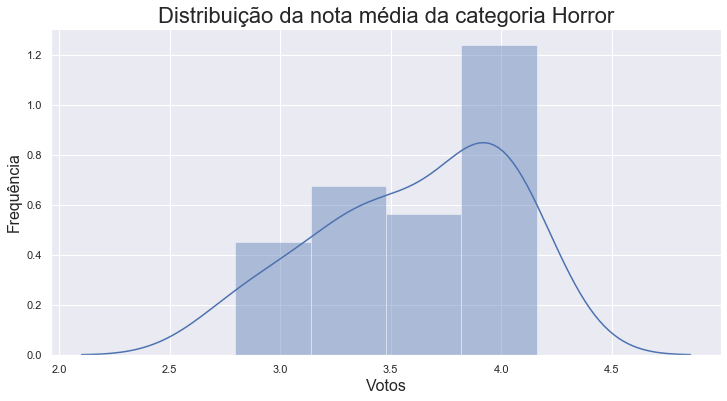

In [38]:
# solucao histograma de horror
ax = sns.distplot(filmes.query('Horror == 1')['nota_media'])

ax.figure.set_size_inches((12, 6))
ax.set_title('Distribuição da nota média da categoria Horror', fontsize=22)
ax.set_xlabel('Votos', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)

In [39]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

stat, pa = normaltest(filmes.query('Adventure == 1')['nota_media'])
stat, ph = normaltest(filmes.query('Horror == 1')['nota_media'])

print('p-value Adventure: %0.15f' % pa)
print('p-value Horror: %0.15f' % ph)

p-value Adventure: 0.012835697582553
p-value Horror: 0.211862846824839


O normaltest indica que temos Horror com uma distribuição normal e Adventure com uma distribuição não normal.

In [40]:
# solução com o teste desejado
from scipy.stats import ranksums

nota_media_adventure = filmes.query('Adventure == 1')['nota_media']
nota_media_horror = filmes.query('Horror == 1')['nota_media']

stat, p = ranksums(nota_media_adventure, nota_media_horror)
print('ranksums p-value: %0.5f' % p)

ranksums p-value: 0.83104


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:

Temos um distribuição normal e outra não, algo que não ficou claro pela análise visual. Ao aplicar o Wilcoxon Ranksums obtemos um p-value maior que 0.05, indicando que não existe diferença considerável nas notas médias dos dois gêneros.

Assim a sugestão do gênero Horror não é mantida, com os testes conseguimos perceber que não existe diferença significativa na nota média. E então não temos argumento para escolher nem um gênero nem outro.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

Recomendo o gênero Adventure, em relação à nota não foi encontrado um gênero superior, e em relação à popularidade foi encontrado que os filmes de Adventure recebem mais votos por filme e no geral.

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [41]:
votos_por_genero

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.0,0.0,0.0,0.0,52.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0
447,59.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0


In [42]:
# solução: calculando os 2 generos mais votados
generos_mais_votados = votos_por_genero.sum().sort_values(ascending=False).index[:2]
generos_mais_votados

Index(['Action', 'Drama'], dtype='object')

In [43]:
# solução: encontrando os top 5 filmes desses generos
filmes.query(f'{generos_mais_votados[0]} == 1 | {generos_mais_votados[1]} == 1').sort_values('nota_media', ascending=False)[:5]

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1276,Cool Hand Luke (1967),1967.0,4.271930,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1221,"Godfather: Part II, The (1974)",1974.0,4.259690,129.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [54]:
# solucao
lista_colunas = list(generos.columns)
lista_colunas.append('nota_media')

filmes[lista_colunas].corr()['nota_media'].sort_values()

# Maior correlação: Drama e Comedy
# Menor correlação: Musical e Documentary

Comedy        -0.256005
Action        -0.154089
SciFi         -0.136717
Adventure     -0.079985
Romance       -0.072002
Western       -0.059642
Horror        -0.033877
Children      -0.030360
Fantasy       -0.020986
Thriller      -0.016782
Musical       -0.008529
Documentary   -0.003486
Animation      0.043071
IMAX           0.064931
FilmNoir       0.081766
War            0.125615
Mystery        0.129914
Crime          0.190220
Drama          0.277662
nota_media     1.000000
Name: nota_media, dtype: float64

## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [55]:
# solucao
lista_colunas = list(generos.columns)
lista_colunas.append('total_de_votos')

filmes[lista_colunas].corr()['total_de_votos'].sort_values()

# Maior correlação: Adventure e Comedy
# Menor correlação: Children e Mystery

Comedy           -0.128527
Western          -0.060789
Documentary      -0.055010
Romance          -0.045427
FilmNoir         -0.039408
Horror           -0.036132
Musical          -0.024741
IMAX             -0.016285
Fantasy          -0.009976
Mystery          -0.007051
Children          0.001764
Drama             0.018779
Animation         0.023442
SciFi             0.063802
Action            0.066239
Crime             0.079766
Thriller          0.085525
War               0.087999
Adventure         0.104380
total_de_votos    1.000000
Name: total_de_votos, dtype: float64

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

Text(0, 0.5, 'Nota Média')

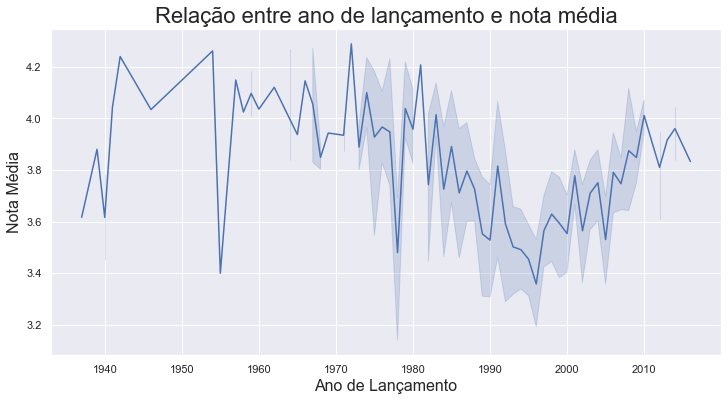

In [46]:
# solucao
ax = sns.lineplot(x='ano_de_lancamento', y='nota_media', data=filmes)

ax.figure.set_size_inches((12, 6))
ax.set_title('Relação entre ano de lançamento e nota média', fontsize=22)
ax.set_xlabel('Ano de Lançamento', fontsize=16)
ax.set_ylabel('Nota Média', fontsize=16)

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [47]:
# solução (código)
filmes[['ano_de_lancamento', 'nota_media']].corr()

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159146
nota_media,-0.159146,1.000000


### Solução (explicação)

Vemos que existe uma correlação, mesmo que pequena, entre os dois conjuntos, algo que parece estranho já que não esperamos que exista uma relação entre os conjuntos (causalidade).

Isso pode ser explicado apenas como uma coincidência, mesmo em conjuntos aletórios podemos encontrar correlações, mesmo que um cause interferência no outro ou não.

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

Text(0.5, 1.05, 'Relação entre ano de lançamento, nota média e total de votos')

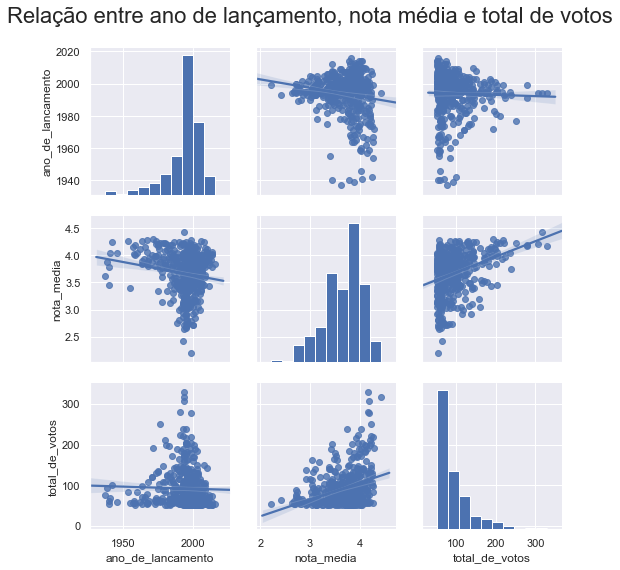

In [48]:
# solução
infos = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos']]

ax = sns.pairplot(infos, kind='reg')

ax.fig.suptitle('Relação entre ano de lançamento, nota média e total de votos', fontsize=22, y=1.05)

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

Text(0.5, 1.05, 'Relação entre ano de lançamento, nota média e total de votos com destaque para o gênero Animation')

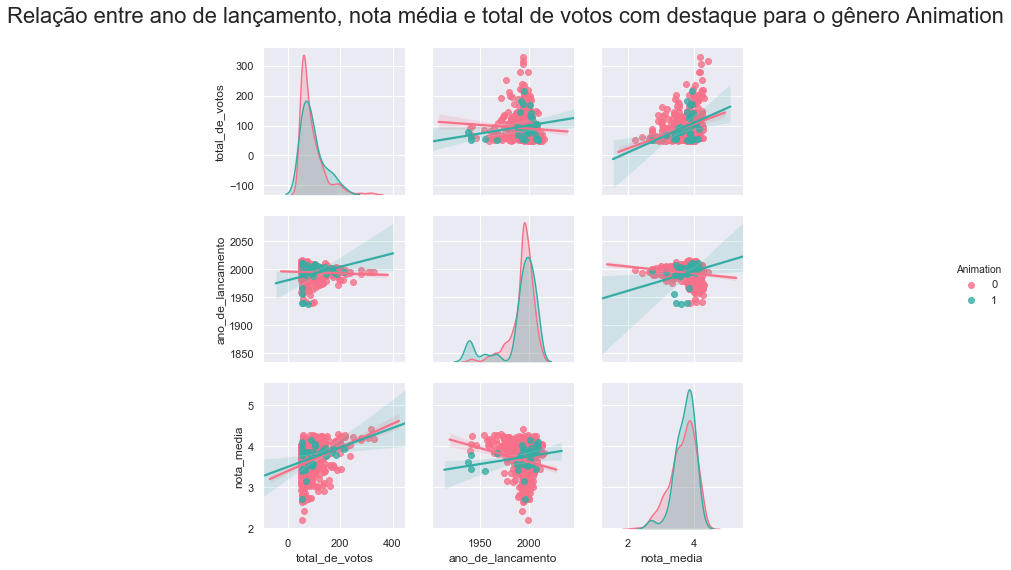

In [49]:
infos = filmes[['total_de_votos', 'ano_de_lancamento', 'nota_media', 'Animation']]

ax = sns.pairplot(infos,
                  y_vars=['total_de_votos', 'ano_de_lancamento', 'nota_media'],
                  x_vars=['total_de_votos', 'ano_de_lancamento', 'nota_media'],
                  hue='Animation',
                  kind='reg', palette='husl')

ax.fig.suptitle('Relação entre ano de lançamento, nota média e total de votos com destaque para o gênero Animation', fontsize=22, y=1.05)

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

- A nota média dos filmes de Animation apresenta uma pequena correlação positiva com o ano de lançamento, filmes mais recentes tendem a ter uma nota média maior. A correlação não é linear, os pontos estão muito espalhados.

- Filmes mais atuais apresentam um maior número de votos, com uma correlação pequena e mais linear que a mencionada acima.

- Já considerando os demais gêneros, a situação se inverte. Temos uma correlação mais linear e negativa.


O gênero animação segue uma tendência contrária aos demais, crescendo na popularidade e na qualidade. É possível que com o passar dos anos os avanços nas tecnologias utilizadas permitem cada vez mais melhores animações, e assim atraem um maior público.

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [50]:
# solução
